## $$\color{red}{\text{Nima Modirkiasaraee - Q3}}$$
## $$\color{red}{\text{810102339}}$$


### Import necessary libraries 

In [16]:
import pandas as pd
import networkx
import numpy as np
import dowhy
from dowhy import gcm
from dowhy.utils import plot
from dowhy.utils import bar_plot

In [2]:
df = pd.read_csv('train_data.csv', index_col = 'Date')
# df.drop('Date', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Booking_Made,Marketing_Budget,Website_Visits,Ticket_Price,Tickets_Sold,Sales_Revenue,Operating_Expenses,Profit
Date,,,,,,,,
2021-01-01,False,1217.741919,11789,1000.0,2389,2389000.0,1.695727e+06,693273.009394
2021-01-02,False,1462.814357,11778,1000.0,2381,2381000.0,1.691967e+06,689032.764060
2021-01-03,False,1498.712891,11804,1000.0,2369,2369000.0,1.686001e+06,682999.025547
2021-01-04,False,1243.245804,11809,1000.0,2371,2371000.0,1.686766e+06,684234.448174
2021-01-05,False,1307.334457,11444,1000.0,2334,2334000.0,1.668317e+06,665683.266002
...,...,...,...,...,...,...,...,...
2021-12-27,False,1491.918477,11842,1000.0,2297,2297000.0,1.650014e+06,646985.859228
2021-12-28,False,1457.854575,11767,1000.0,2328,2328000.0,1.665461e+06,662538.676222
2021-12-29,False,1318.752677,11745,1000.0,2336,2336000.0,1.669319e+06,666680.987999


## Section 1

In [3]:
G = networkx.DiGraph()
G.add_edge('Booking_Made', 'Marketing_Budget')
G.add_edge('Booking_Made', 'Website_Visits')
G.add_edge('Booking_Made', 'Ticket_Price')
G.add_edge('Booking_Made', 'Tickets_Sold')
G.add_edge('Marketing_Budget', 'Website_Visits')
G.add_edge('Marketing_Budget', 'Operating_Expenses')
G.add_edge('Website_Visits', 'Tickets_Sold')
G.add_edge('Ticket_Price', 'Tickets_Sold')
G.add_edge('Ticket_Price', 'Sales_Revenue')
G.add_edge('Tickets_Sold', 'Sales_Revenue')
G.add_edge('Tickets_Sold', 'Operating_Expenses')
G.add_edge('Sales_Revenue', 'Profit')
G.add_edge('Operating_Expenses', 'Profit')

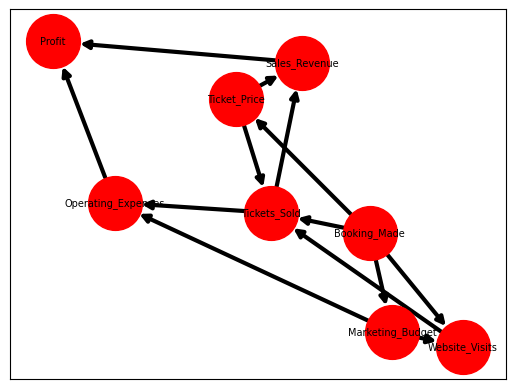

In [4]:
options = {
    'node_color': 'red',
    'node_size': 1500,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
    'node_shape': 'o',
    'font_size': 7
}

networkx.draw_networkx(G, arrows = True ,  **options)

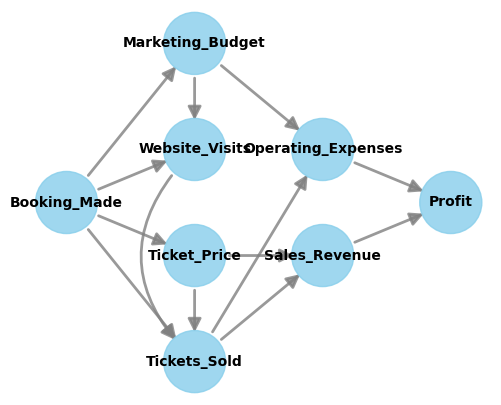

In [5]:
plot(G)

## Section 2

In [6]:
# Create the structural causal model object
scm = gcm.StructuralCausalModel(G)

# Automatically assign generative models to each node based on the given data
auto_assignment_summary = gcm.auto.assign_causal_mechanisms(scm, df, override_models=True, quality=gcm.auto.AssignmentQuality.GOOD)

In [7]:
print(auto_assignment_summary)

When using this auto assignment function, the given data is used to automatically assign a causal mechanism to each node. Note that causal mechanisms can also be customized and assigned manually.
The following types of causal mechanisms are considered for the automatic selection:

If root node:
An empirical distribution, i.e., the distribution is represented by randomly sampling from the provided data. This provides a flexible and non-parametric way to model the marginal distribution and is valid for all types of data modalities.

If non-root node and the data is continuous:
Additive Noise Models (ANM) of the form X_i = f(PA_i) + N_i, where PA_i are the parents of X_i and the unobserved noise N_i is assumed to be independent of PA_i.To select the best model for f, different regression models are evaluated and the model with the smallest mean squared error is selected.Note that minimizing the mean squared error here is equivalent to selecting the best choice of an ANM.

If non-root node

In [8]:
gcm.fit(scm, df)

Fitting causal mechanism of node Profit: 100%|██████████| 8/8 [00:00<00:00, 195.61it/s]   


The fit method learns the parameters of the generative models in each node. Before we continue, let’s have a quick look into the performance of the causal mechanisms and how well they capture the distribution:

Test permutations of given graph: 100%|██████████| 50/50 [00:19<00:00,  2.56it/s]


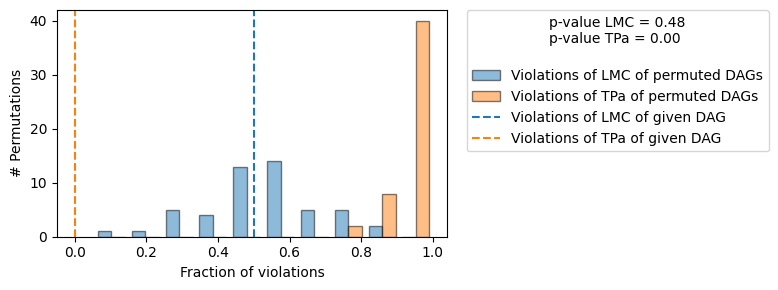

Evaluated the performance of the causal mechanisms and the overall average KL divergence between generated and observed distribution and the graph structure. The results are as follows:

==== Evaluation of Causal Mechanisms ====
The used evaluation metrics are:
- KL divergence (only for root-nodes): Evaluates the divergence between the generated and the observed distribution.
- Mean Squared Error (MSE): Evaluates the average squared differences between the observed values and the conditional expectation of the causal mechanisms.
- Normalized MSE (NMSE): The MSE normalized by the standard deviation for better comparison.
- R2 coefficient: Indicates how much variance is explained by the conditional expectations of the mechanisms. Note, however, that this can be misleading for nonlinear relationships.
- F1 score (only for categorical non-root nodes): The harmonic mean of the precision and recall indicating the goodness of the underlying classifier model.
- (normalized) Continuous Ranked P

In [9]:
print(gcm.evaluate_causal_model(scm, df, compare_mechanism_baselines=True, evaluate_invertibility_assumptions=False))

## Section 3

In [10]:
df['Profit'].var()

In [11]:
df['Profit'].std()

At this point, we want to understand which factors drive changes in the Profit. Let us first have a closer look at the Profit over time. For this, we plot the Profit over time for 2021, where the produced plot shows the Profit in dollars on the Y-axis and the time on the X-axis.

<Axes: xlabel='Date', ylabel='Profit in $'>

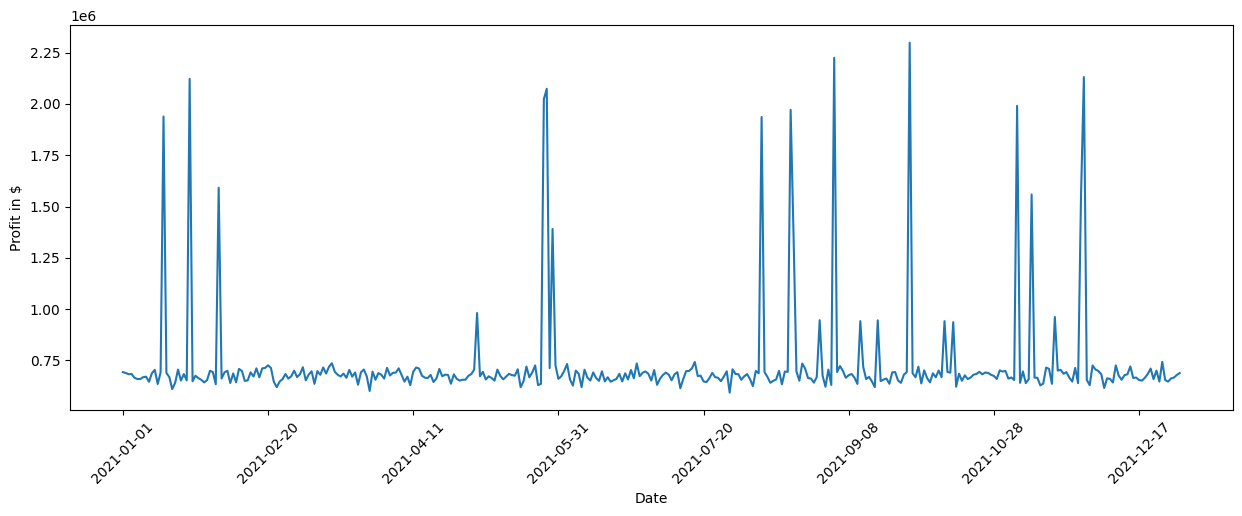

In [12]:
df['Profit'].plot(ylabel='Profit in $', figsize=(15,5), rot=45)

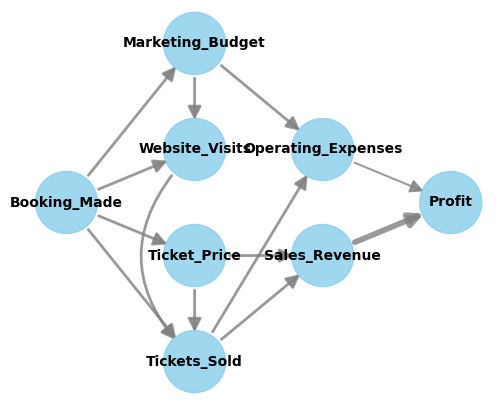

In [13]:
# Note: The percentage conversion only makes sense for purely positive attributions.
def convert_to_percentage(value_dictionary):
    total_absolute_sum = np.sum([abs(v) for v in value_dictionary.values()])
    return {k: abs(v) / total_absolute_sum * 100 for k, v in value_dictionary.items()}


arrow_strengths = gcm.arrow_strength(scm, target_node='Profit')
percentages = convert_to_percentage(arrow_strengths)
plot(G, causal_strengths = percentages)

In [15]:
print(percentages)

{('Operating_Expenses', 'Profit'): 25.127083749876316, ('Sales_Revenue', 'Profit'): 74.87291625012368}


Since Profit itself is only the difference between Revenue and Operational Cost, we do not expect further factors influencing the variance. As we see, Revenue has more impact than Operational Cost. This makes sense seeing that Revenue typically varies more than Operational Cost due to the stronger dependency on the number of sold units. Note that the direct arrow strength method also supports the use of other kinds of measures, for instance, KL divergence.

While the direct influences are helpful in understanding which direct parents influence the most on the variance in Profit, this mostly confirms our prior belief. The question of which factor is ultimately responsible for this high variance is, however, still unclear. For instance, Revenue itself is based on Sold Units and the Unit Price. Although we could recursively apply the direct arrow strength to all nodes, we would not get a correctly weighted insight into the influence of upstream nodes on the variance.

## Section 4

Estimating Shapley Values. Average change of Shapley values in run 29 (145 evaluated permutations): 0.5369952213386473%: 100%|██████████| 1/1 [00:56<00:00, 56.69s/it]


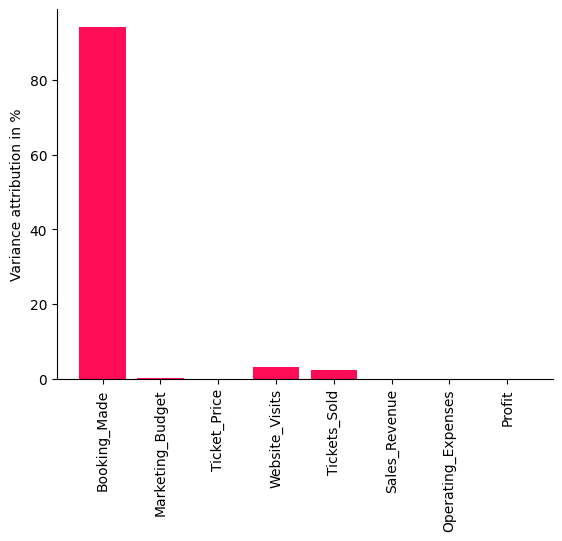

In [17]:
iccs = gcm.intrinsic_causal_influence(scm, target_node='Profit', num_samples_randomization=500)
bar_plot(convert_to_percentage(iccs), ylabel='Variance attribution in %')

The scores shown in this bar chart are percentages indicating how much variance each node is contributing to Profit — without inheriting the variance from its parents in the causal graph.

## Section 5

In [18]:
df

,Booking_Made,Marketing_Budget,Website_Visits,Ticket_Price,Tickets_Sold,Sales_Revenue,Operating_Expenses,Profit
Date,,,,,,,,
2021-01-01,False,1217.741919,11789,1000.0,2389,2389000.0,1.695727e+06,693273.009394
2021-01-02,False,1462.814357,11778,1000.0,2381,2381000.0,1.691967e+06,689032.764060
2021-01-03,False,1498.712891,11804,1000.0,2369,2369000.0,1.686001e+06,682999.025547
2021-01-04,False,1243.245804,11809,1000.0,2371,2371000.0,1.686766e+06,684234.448174
2021-01-05,False,1307.334457,11444,1000.0,2334,2334000.0,1.668317e+06,665683.266002
...,...,...,...,...,...,...,...,...
2021-12-27,False,1491.918477,11842,1000.0,2297,2297000.0,1.650014e+06,646985.859228
2021-12-28,False,1457.854575,11767,1000.0,2328,2328000.0,1.665461e+06,662538.676222
2021-12-29,False,1318.752677,11745,1000.0,2336,2336000.0,1.669319e+06,666680.987999


In [22]:
first_day_new_year = pd.DataFrame({'Booking_Made': [True], 'Marketing_Budget': 2079.01, 'Website_Visits': 21110, 'Ticket_Price': 700.47, 'Tickets_Sold': 7987, 'Sales_Revenue': 5594652.87, 'Operating_Expenses': 4495588.74, 'Profit': 1099064.13})
first_day_new_year

,Booking_Made,Marketing_Budget,Website_Visits,Ticket_Price,Tickets_Sold,Sales_Revenue,Operating_Expenses,Profit
0,True,2079.01,21110,700.47,7987,5594652.87,4495588.74,1099064.13


In [26]:
increase_percentage = first_day_new_year['Profit'][0] / df['Profit'][0] - 1
print(f'The profit increased by {increase_percentage}%')

The profit increased by 0.5853265814580071%


C:\Users\nimamodir\AppData\Local\Temp\ipykernel_8676\3879919555.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  increase_percentage = first_day_new_year['Profit'][0] / df['Profit'][0] - 1


Estimating Shapley Values. Average change of Shapley values in run 108 (540 evaluated permutations): 1.740234384335329%: 100%|██████████| 1/1 [00:10<00:00, 10.92s/it]


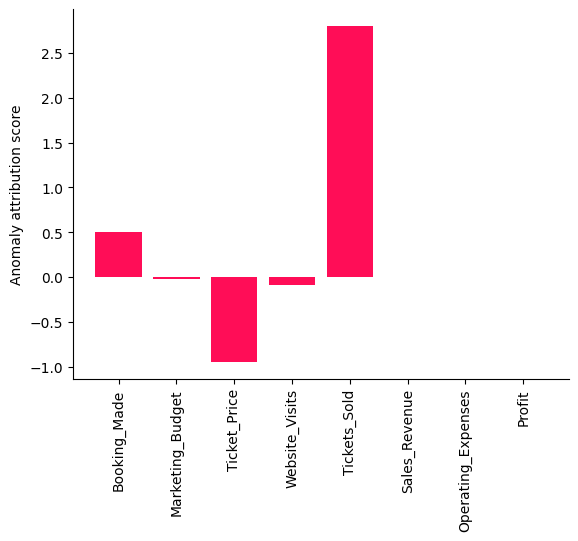

In [27]:
attributions = gcm.attribute_anomalies(scm, target_node='Profit', anomaly_samples=first_day_new_year)

bar_plot({k: v[0] for k, v in attributions.items()}, ylabel='Anomaly attribution score')